# Lab 3: CIFAR-10 Challenge

In this lab you will experiment with whatever ConvNet architecture/design you'd like on [CIFAR-10 image dataset](https://www.cs.toronto.edu/~kriz/cifar.html). 

### Group#: 08  

|Name | Student ID | 
|:-:|:-:|
|Rohit Rohit  |  0773987|
|Rakesh Singh  | 0775942 |
|Praveen Thudianplackal Jose  | 0779521 |
|Reshma Thomas  | 0779853 |


## What to submit

 - A completed .ipynb file with all code executed and all output visible
 - A PDF/HTML version of the above file
 
## Part 1: Creating the network (50% of grade)

**Goal:** After training, your model should achieve **at least 80%** accuracy on a **validation** set within 20 epochs. (Or as close as possible as long as there is demonstrated effort to achieve this goal.)

**Data split** The training set should consist of 40000 images, the validation set should consist of 10000 images, and the test set should consist of the remaining 10000 images. **Please use the Keras `load_data()` function to import the data set.**


**Implementation** All code should be in Keras/python. 

### Some things you can try:
- Different number/type of layers
- Different filter sizes 
- Adjust the number of filters used in any given layer
- Try various pooling strategies
- Consider using batch normalization
- Check if adding regularization helps
- Consider alternative optimizers
- Try different activation functions


### Tips for training
When building/tuning your model, keep in mind the following points: 

- This is experimental, so be driven by results achieved on the validation set as opposed to what you have heard/read works well or doesn't
- If the hyperparameters are working well, you should see improvement in the loss/accuracy within approximately one epoch
- For hyperparameter tuning: start by testing a large range of hyperparameters for just a few training iterations to find the combinations of parameters that are working at all
- Once you have found some sets of hyperparameters that seem to work, search more finely around these parameters. You may need to train for more epochs.
- Prefer random search to grid search for hyperparameters
- You should use the validation set for hyperparameter search and for evaluating different architectures
- The test set should only be used at the very end to evaluate your final model

### What to provide

The cell below should contain all the code necessary to run your final network on the cifar10 dataset as contained within Keras. All necessary hyperparameters should be visible either in the code or through comments. Your code should include 2 plots: one for training and validation loss per epoch and one for training and validation accuracy per epoch.  

Your network should produce an accuracy of at least 80% on the validation set within 20 epochs. (Or as close as possible as long as there is demonstrated effort to achieve this goal.)

You should also evaluate and report the accuracy on the test set. The test set should be used only once. That is, after you have decided on what to include in your network and tuned any hyperparameters for your final network, you should use this final network on the test set and calculate the accuracy.  

**Please make sure that all code has been run and the output is visible in the notebook before submitting.**

**Please note that I should be able to run the single code cell below and reproduce your results.**

**All code should be in ONE code cell.**

170508288/170498071 [==============================] - 5s 0us/step
(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                  

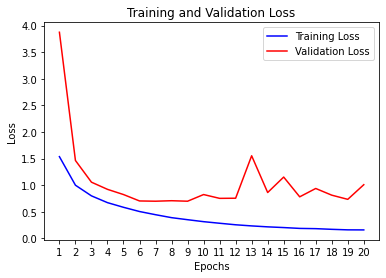

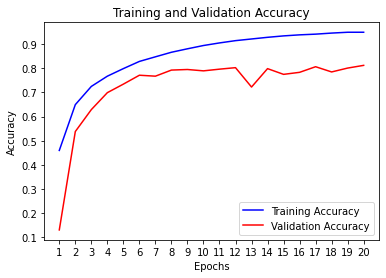

In [ ]:
import keras
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Conv2D


# load dataset
np.random.seed(100)
(trainX, trainY), (testX, testY) = cifar10.load_data()

# Use the first 10,000 samples of our training data as our validation set
val_data = trainX[:10000]
val_labels = trainY[:10000]

# Use the remainder of the original training data for actual training
partial_train_data = trainX[10000:]
partial_train_labels = trainY[10000:]

# Scale the pixel values so they lie in the range of 0-1
partial_train_data = partial_train_data / 255.
val_data = val_data / 255.
test_data = testX /255.


print(partial_train_data.shape)
print(val_data.shape)
print(test_data.shape)


from tensorflow.keras.utils import to_categorical

partial_train_labels = to_categorical(partial_train_labels)
val_labels = to_categorical(val_labels)
test_labels = to_categorical(testY)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.3),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    Dropout(0.2),
    Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(filters=512, kernel_size=(5, 5), padding='valid', activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.2),
    BatchNormalization(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(10, activation='softmax')])

model.summary()

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(partial_train_data, 
                    partial_train_labels, 
                    epochs=20, 
                    batch_size=128, 
                    validation_data=(val_data, val_labels),verbose=1)
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('test_acc:', test_acc)

val_loss, val_acc = model.evaluate(val_data, val_labels)
print('val_acc:', val_acc)


import matplotlib.pyplot as plt  # needed to create our plot

history_dict = history.history # the dictionary that has the information on loss and accuracy per epoch

loss_values = history_dict['loss']   # training loss
val_loss_values = history_dict['val_loss'] # validation loss

epochs = range(1, len(loss_values)+1)  #creates list of integers to match the number of epochs of training

# code to plot the results
plt.plot(epochs, loss_values, 'b', label="Training Loss")
plt.plot(epochs, val_loss_values, 'r', label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()


# As above, but this time we want to visualize the training and validation accuracy
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'b', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Part 2: Describe What you did (50% of grade)

All the work you did leading up to your final model should be summarized in this section. This should be a logical and well-organized summary of the various experiments that were tried in **Part 1**, and should be captured in **table format**. Upon reading this section I should understand what you tried, the reasoning behind trying it, any quantitative values that correspond to what you tried, and the results. 

See [this guide](https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook) for how to format markdown cells in Jupyter notebooks. 

**Test accuracy: 80.48%**\
**Validation accuracy: 81.17%**

#### Model process

The steps we followed to create the model and getting this accuracy is explained below:

1. Imported all required libraries such as keras, tensorflow etc.
2. Total data is divided into three sets, 10,000 data used for training, 10,000 for validation and pending 40,000 is used for testing purpose.
3. The Original input data pixel value ranges from 0-255, that we have changed to the range of 0-1 by dividing it by 255.
4. Converted the labels to the categorical value.
5. Created the sequential model using the convolution layers as well as the fully connected layers. Here we have used 6 convolution layers, also used different types of padding such as same & valid. The activation fuction used is relu and softmax. In addition, the dense is used for creating the fully connected layers. Here we have used the strides of value 1 for normal layers and value of 2 for deeper layers.
6. Run the model summary for viewing the output of all the layers.
7. While doing the model compailing, we have used optimizer as 'rmsprop', loss as 'categorical_crossentropy' and the metrics for evaluation is choosed as 'accuracy'.
8. Fit the model with selected parameters, such as epochs of 20 and batch size =12.
9. Finally plotted the graph for evaluating the Traing and validation accuracy as well as the loss.

#### Each Layer details have been given below for the final model :- 

|Layer | Filters |  Kernal Size |  Output shape |  Padding |  Activation | Pool Size | Strides |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|conv2d (Conv2D) | 32 | 3, 3 |  (None, 32, 32, 32) |  same |  relu | - | - |
|conv2d_1 (Conv2D) | 32 | 3, 3 |  (None, 32, 32, 32) |  same |  relu | - | - |
|max_pooling2d (MaxPooling2D) | - | - |  (None, 16, 16, 32) | - | - | 2 | 2 |
|dropout (Dropout) | - | - |  (None, 16, 16, 32) | - | - | - | - |
|conv2d_2 (Conv2D) | 64 | 3, 3 |  (None, 16, 16, 64)  |  same |  relu | - | - | 
|conv2d_3 (Conv2D) | 64 | 3, 3 |  (None, 16, 16, 64) |  same |  relu | - | - |
|dropout_1 (Dropout) | - | - |  (None, 16, 16, 64) | - | - | - | - |
|conv2d_4 (Conv2D) | 128 | 3, 3 |  (None, 16, 16, 128) |  same |  relu | - | - | 
|conv2d_5 (Conv2D) | 512 | 5, 5 |  (None, 12, 12, 512) |  valid |  relu | - | - |
|max_pooling2d_1 (MaxPooling2D) | - | - |  (None, 6, 6, 512) | - | - | 2 | 2 |
|dropout_2 (Dropout) | - | - |  (None, 6, 6, 512) | - | - | - | - |
|flatten (Flatten) | - | - |  (None, 18432) | - | - | - | - |
|dense (Dense) | - | - |  (None, 128) | - | relu | - | - |
|dropout_3 (Dropout) | - | - |  (None, 128) | - | - | - | - |
|dense_1 (Dense) | - | - |  (None, 10) | - | softmax| - | - |


#### Changes made to reach the desired accuracy :-

| Model No. |No. of Conv2D Layers | No. of dropout layers |  Epoch |  batch size |  Test Accuracy |  Val. Accuracy | Step |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| 1 | 4 | 3 | 12 | 128 | 73.74% | 73.85% | - |
| 2 | 5 | 3 | 13 | 128 | 77.45% | 77.8% | Added Convulation layer and increased the epoch by 1 |
| 3 | 6 | 4 | 20 | 128 | 80.48% | 81.17% | Added oConvulation layer as well ass dropout layer and also increased the epoch to 20 |


####  Parameters 

|Parameter | Explanation | 
|:-:|:-:|
| Activation Function |It specifies how the weighted sum of the input is turned into an output from a node or nodes in a layer. The activation functions are used in this model are Softmax and relu |
|Optimzers  |The network's parameters (weights and biases) are updated using an optimizer depending on the data it observes and its loss function. For changing the network's parameters, this is similar to the gradient descent recipe.|
|Padding|While the kernel of a CNN processes a picture, the number of pixels added to it.|
|Epoch | Here epoch number is given as 20 as mentioned in the Instruction.  Epoch clarifying  howmanny times the learning algorithm is passing through the whole training dataset. The accuracy is directly propotional to the number of epoch, but after reaching one value the accuracy will be remain constant againt increase in number of epoch. Here we have used the number of epoch is 20, which is pretty good to provide the required standard accuracy. |
|Batch size | Batch size denotes prior to the model updation and mention howmany number of samples has been processed. Here we have used is batch size-32. It is a hyperparameter during training time we choosed batch size -32 is works better for our model. When we didn’t propose to take high value of batch size due to the high memory usage.  |
|Verbos | We have used verbos value- 1 which contains, 2 lines of progress bar as well as one line for each epoch.  |
|Kernel_initializer |Kernel_initializer will help to generate the initial weight in the model and can use it as the starting weight. It will help to generate more consistent nueral networks also will help to train the model efficiently. |
|BatchNormalization |Batch normalization is a modification that keeps the average output around 0 and the standard deviation near 1. |


### References

Please include all references used in completing this lab: books, tutorials, blogs, github, etc.

<ol>
<li>https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python</li>
<li>https://keras.io/api/optimizers/</li>
<li>https://stackoverflow.com/questions/47902295/</li>
</ol>